In [203]:
from data import Data
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn; seaborn.set()

%matplotlib inline

In [225]:
Data()

for file_name in os.listdir('.'):
    if file_name.endswith('.csv'):
        print(file_name)

CSV files successfully generated
canada_cases.csv
bc_cases.csv


# Examining Data

We first examine Covid-19 data in all provinces of Canada

In [226]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
canada_data = pd.read_csv('canada_cases.csv', parse_dates=['Date'], date_parser=d_parser)
canada_data.set_index('Date', inplace=True)

/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [227]:
canada_data

,New_Cases,New_Death,New_Recoveries,Total_Cases,Total_Death,Total_Recoveries
Date,,,,,,
2020-01-25,1,0,0,1,0,0
2020-01-26,1,0,0,2,0,0
2020-01-27,0,0,0,2,0,0
2020-01-28,1,0,0,3,0,0
2020-01-29,0,0,0,3,0,0
...,...,...,...,...,...,...
2020-12-06,7003,88,5033,420210,12716,334150
2020-12-07,6551,104,9688,426761,12820,343838
2020-12-08,6211,94,5836,432972,12914,349674


Number of days that Canada has been impacted by Covid 19

In [77]:
print(len(canada_data), 'days')

320 days


As we can see, the new cases are increasing day by day -> draw the graph

In [228]:
canada_new_cases = canada_data['New_Cases']

In [229]:
canada_new_cases

Date
2020-01-25       1
2020-01-26       1
2020-01-27       0
2020-01-28       1
2020-01-29       0
              ... 
2020-12-06    7003
2020-12-07    6551
2020-12-08    6211
2020-12-09    6356
2020-12-10    2468
Name: New_Cases, Length: 321, dtype: int64

In [230]:
canada_data['2020-1': '2020-05']['New_Cases']

Date
2020-01-25      1
2020-01-26      1
2020-01-27      0
2020-01-28      1
2020-01-29      0
             ... 
2020-05-27    900
2020-05-28    994
2020-05-29    934
2020-05-30    776
2020-05-31    816
Name: New_Cases, Length: 128, dtype: int64

In [231]:
max_week = canada_data[['New_Cases', 'New_Recoveries']].resample('W').mean()
max_week

,New_Cases,New_Recoveries
Date,,
2020-01-26,1.000000,0.000000
2020-02-02,0.285714,0.000000
2020-02-09,0.428571,0.000000
2020-02-16,0.142857,0.000000
2020-02-23,0.285714,0.000000
2020-03-01,2.000000,1.000000
2020-03-08,6.000000,0.142857
2020-03-15,39.285714,0.285714
2020-03-22,168.285714,1.142857


In [235]:
# Active cases
active_cases = canada_data['Total_Cases'] - canada_data['Total_Recoveries'] - canada_data['Total_Death'] 
active_cases

Date
2020-01-25        1
2020-01-26        2
2020-01-27        2
2020-01-28        3
2020-01-29        3
              ...  
2020-12-06    73344
2020-12-07    70103
2020-12-08    70384
2020-12-09    70912
2020-12-10    71505
Length: 321, dtype: int64

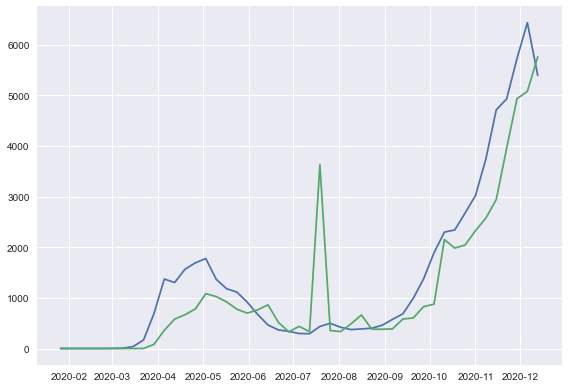

In [233]:
plt.style.use('seaborn')
plt.plot(max_week)



plt.tight_layout()

In [8]:
canada_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
New_Cases,320.0,1372.946875,1637.443550,0.0,338.00,678.0,1692.0,7003.0
New_Death,320.0,40.746875,50.817224,0.0,4.75,16.0,64.0,228.0
New_Recoveries,320.0,1110.553125,1909.137890,0.0,252.50,550.5,1047.0,23999.0
Total_Cases,320.0,115559.709375,102374.840597,1.0,27503.50,106669.0,146361.5,439330.0
Total_Death,320.0,6384.278125,4228.257556,0.0,930.75,8701.0,9260.0,13039.0
Total_Recoveries,320.0,88530.609375,85679.579706,0.0,8110.00,68507.0,126395.5,355377.0
